In [2]:
import matplotlib.pyplot as plt
import mrcfile
import pooch
import torch
from torch_peaks.find_peaks import peak_local_max_3d

In [3]:

tomo = pooch.retrieve("https://ftp.ebi.ac.uk/pub/databases/emdb/structures/EMD-25061/map/emd_25061.map.gz",known_hash=None)


In [4]:
with mrcfile.open(tomo, mode='r') as mrc:
    # print the map header
    tomo_data = torch.tensor(mrc.data).to("cuda:0")


In [5]:
with torch.no_grad():
    # Find peaks in the 3D volume
    peaks = peak_local_max_3d(
                volume = -1. * tomo_data,
                threshold_abs=30,
                min_distance=3,
            )

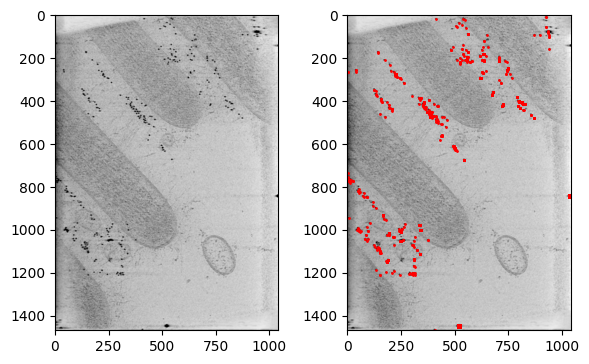

In [11]:
fig, [pl1, pl2] = plt.subplots(1, 2, figsize=(6, 4))
tomo_data = tomo_data.cpu()
pl1.imshow(torch.min(tomo_data, dim=0).values, cmap='gray',interpolation='mitchell', vmin=0, vmax=70)
peaks = peaks.cpu()
pl2.imshow(torch.min(tomo_data, dim=0).values, cmap='gray',interpolation='mitchell', vmin=0, vmax=70)
pl2.plot(peaks[:, 2], peaks[:, 1], 'r.', markersize=2)
plt.tight_layout()
plt.show()